In [ ]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict


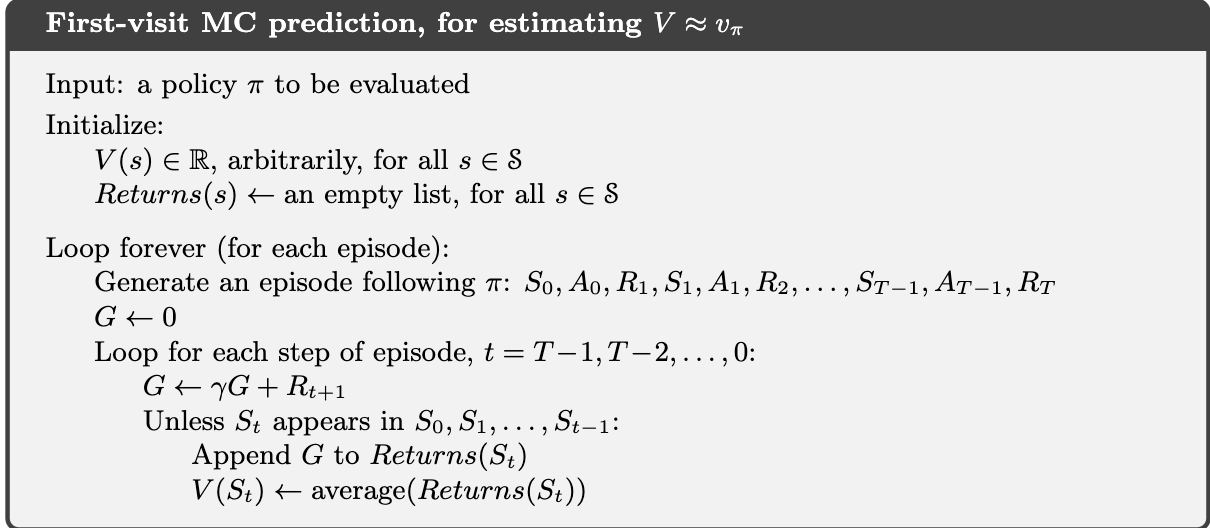

In [ ]:
def first_visit_MC_prediction(env, policy, discount_factor, episodes):

    returns_sum = defaultdict(float)   # sum of returns per state
    returns_count = defaultdict(float) # count of visits per state
    V = defaultdict(float)             # state-value function

    for i in range(episodes):

        episode = []
        state, _ = env.reset()

        # generate an episode following policy
        while True:
            action = policy(state)
            s_prime, r, term, trun, _ = env.step(action)
            episode.append((state, action, r))
            if term or trun:
                break
            state = s_prime

        # compute returns and update values (first-visit)
        G = 0
        states_visited = set()
        for t in reversed(range(len(episode))): 
            s, _, r = episode[t]
            G = r + discount_factor * G
            if s not in states_visited:  # only update on first visit
                returns_sum[s] += G
                returns_count[s] += 1.0
                V[s] = returns_sum[s] / returns_count[s]
                states_visited.add(s)
        
    return V

